In [ ]:
# importing liabraries
import pandas as pd
import numpy as np

In [ ]:
# loading the data set
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# checking the data types of the variables
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
# statistical measures for each variable
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# checking duplicates in the data set
duplicate_count = int(df.duplicated().sum())
print(duplicate_count)

0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


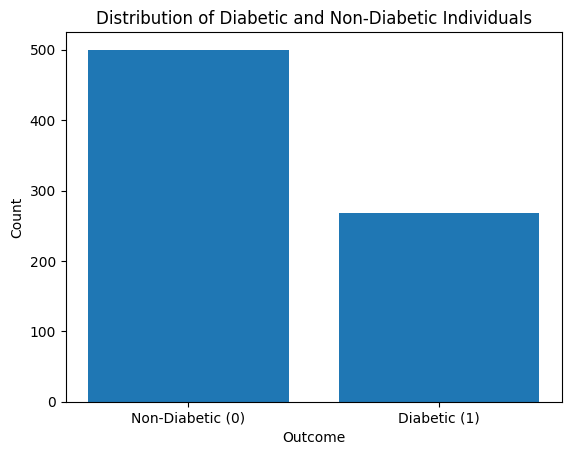

In [ ]:
# visualising the distribution of the outcomes

import matplotlib.pyplot as plt

outcome_counts = df['Outcome'].value_counts().sort_index()  # ensures 0 comes before 1

labels = ['Non-Diabetic (0)', 'Diabetic (1)']
values = outcome_counts.values

plt.bar(labels, values)

plt.title('Distribution of Diabetic and Non-Diabetic Individuals')
plt.xlabel('Outcome')
plt.ylabel('Count')

plt.show()

Now let's check the mean value for each variable for both the class diabetic (1) and non-diabetic (0)

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


* Diabetic individuals tend to have more pregnancies than non-diabetics.

* Glucose levels are significantly higher in diabetics.

* Diabetics show slightly higher blood pressure.

* Skin thickness is generally greater in diabetics, indicating more body fat.

* Insulin levels are higher among diabetics, possibly due to insulin resistance.

* Diabetics have a higher Body Mass Index (BMI), indicating obesity.

* Family history of diabetes is more prominent in diabetics.

* Diabetic individuals are older on average compared to non-diabetics.



In [ ]:
# Let's divide the dataset into x and y where y is the outcome and x is the all other variables
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Data Standardisation

The standardisation is required since the range of each variables are different.If standardisation os not done, Features with large values (eg: Glucose) will dominate the model and features with small values (eg: Pedigree) will be nearly ignored. The model becomes biased toward large-scale features, leading to poor learning and prediction.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
Y_scaled = Y

In [ ]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Using stratify=Y in train_test_split keeps the ratio of classes (like 1 : 0) the same in both training and testing sets as it is in the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, stratify=Y_scaled, random_state=2)

In [ ]:
print(X_scaled.shape, X_train.shape, X_test.shape)
print(Y_scaled.shape, Y_train.shape, Y_test.shape)

(768, 8) (614, 8) (154, 8)
(768,) (614,) (154,)


Training model

Here we use **Support Vector Machine** for the prediction

In [ ]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')

In [ ]:
# training the svm classifie
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Accuracy on the train data
Y_train_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

print('Accuracy of the train data : ', train_data_accuracy)

Accuracy of the train data :  0.7866449511400652


In [ ]:
# Accuracy on the test data
Y_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

print('Accuracy of the test data : ', test_data_accuracy)

Accuracy of the test data :  0.7727272727272727


Making Prediction

In [ ]:
def predict_diabetes(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_standardized = scaler.transform(input_array)
    prediction = classifier.predict(input_standardized)[0]

    if prediction == 0:
        print("The person is non-diabetic")
    else:
        print("The person is diabetic")


In [ ]:
input = (10,120,102,0,0,37.6,0.591,40)
predict_diabetes(input)

The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input = (1,85,66,29,0,26.6,0.351,31)
predict_diabetes(input)

The person is non-diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
